In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/test.csv
/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv


In [2]:
import pandas as pd
import keras.utils as util
import matplotlib.pyplot as plt
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers import Conv2D, MaxPool2D
from keras.layers.core import Dense, Dropout, Flatten
from keras.models import Sequential

def read_train():
    train = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
    y_train = util.to_categorical(train['label'])
    x_train = normalize(train.drop(labels=['label'], axis=1))
    del train
    return x_train, y_train

def read_test():
    test = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
    return normalize(test)


def normalize(x):
    x = x.values.reshape(-1, 28, 28, 1)
    x = x / 255.0
    return x

In [3]:
x_train, y_train = read_train()

In [4]:
def build():
    model = Sequential()

    model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu', input_shape=(28, 28, 1)))
    model.add(Conv2D(filters=32, kernel_size=(5, 5), padding='Same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
    model.add(Conv2D(filters=64, kernel_size=(3, 3), padding='Same', activation='relu'))
    model.add(MaxPool2D(pool_size=(2, 2), strides=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))

    model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        25632     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0

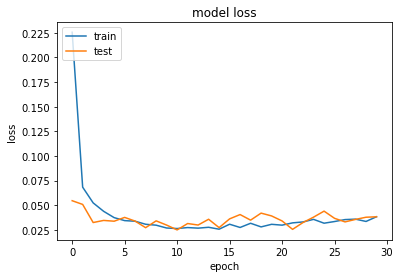

In [5]:

model = build()
model.summary()

history = model.fit(
        x_train, y_train,
        epochs=30,
        batch_size=86,
        validation_split=0.05,
        shuffle=True
    )

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()




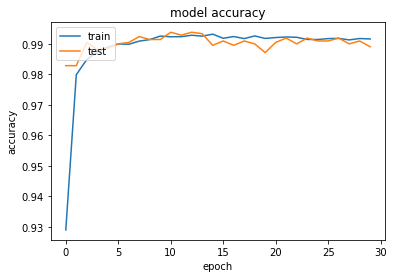

In [6]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [7]:
test = read_test()
results = model.predict(test)
results = np.argmax(results, axis=1)

results = pd.Series(results, name="Label")
num_col = pd.Series(range(1, 28001), name="ImageId")
submission = pd.concat([num_col, results], axis=1)
submission.to_csv("submission.csv", index=False)